# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [5]:
# Обчислюємо середню к-ть оренди на місяць:
monthly_avg = df['count'].resample('ME').mean()

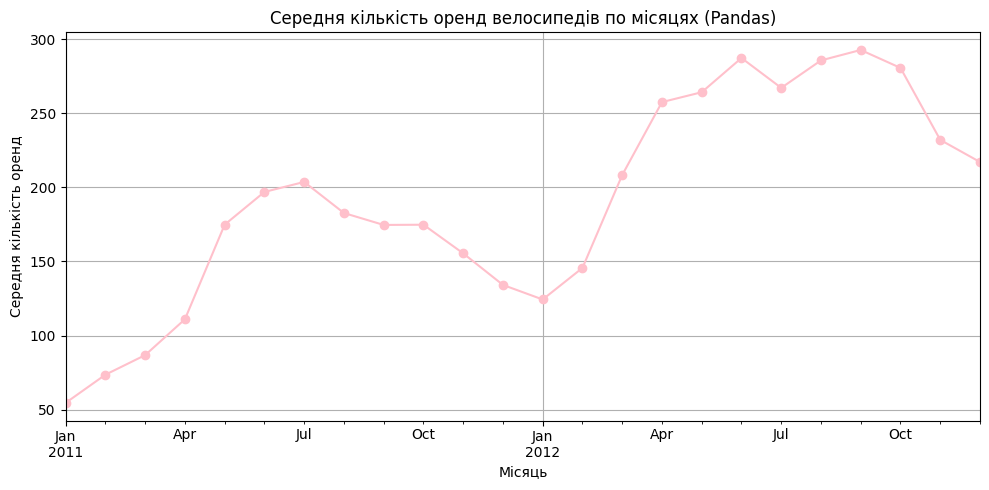

In [13]:
# 1. Використовуємо Pandas (DataFrame.plot())

monthly_avg.plot(
    kind='line',
    marker='o',
    color='pink',
    figsize=(10, 5),
    title='Середня кількість оренд велосипедів по місяцях (Pandas)'
)

plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

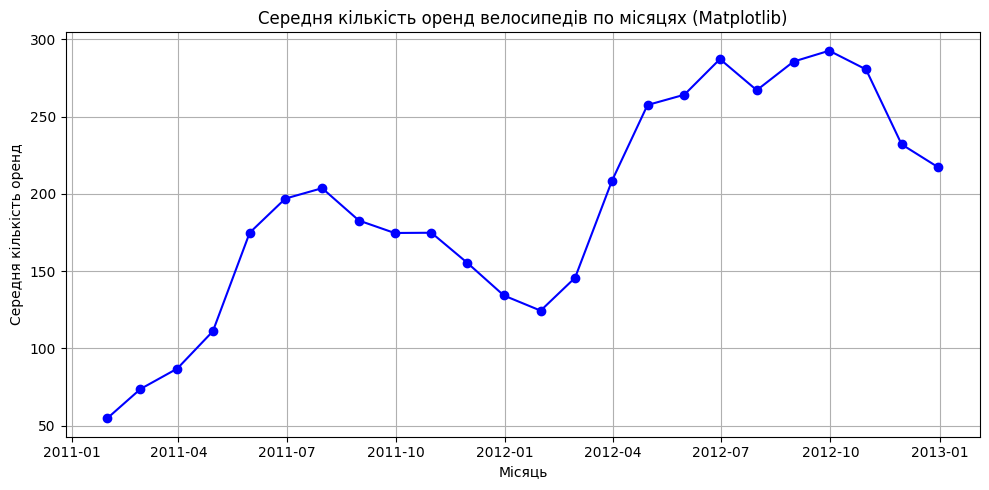

In [17]:
# 2.Використовуючи Matplotlib безпосередньо

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='blue')
plt.title('Середня кількість оренд велосипедів по місяцях (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Середня кількість оренд')
plt.grid(True)
plt.tight_layout()
plt.show()

**Опис спостерержень**
Коротший код та простіший для швидкого аналізу з Pandas, але гнучкішй котроль над графіком має Matplotlib. 

Тобто, якщо потрібно швидко проаналізвати дані - використовуватиму Pandas. Для красивих презентацій, коли потрібно використати додаткові налаштування  стрілок, осей,  ліній - Matplotlib.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [18]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень1

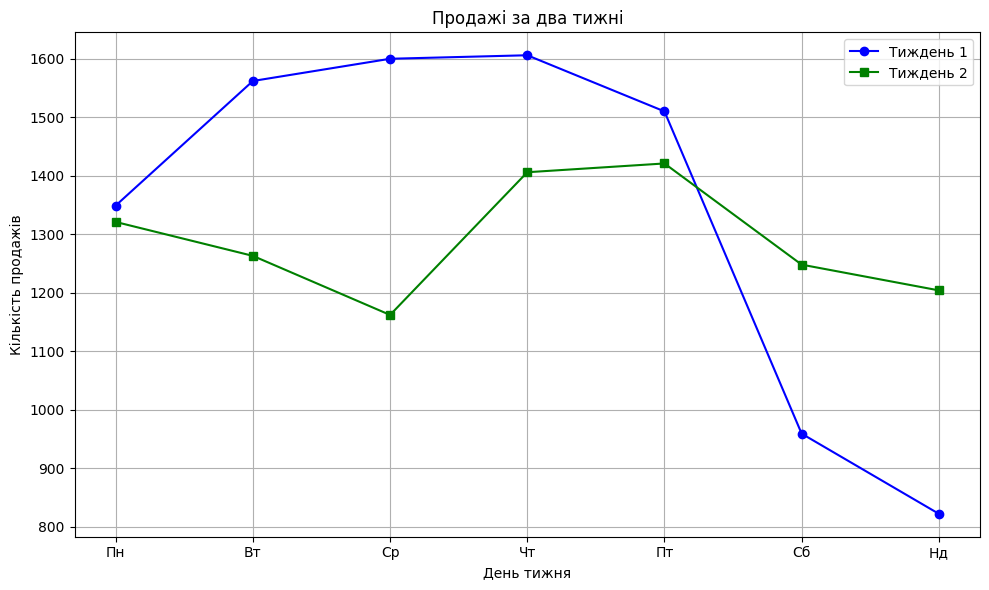

In [21]:
# Назви днів тижня для підписів
day_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']

# Побудова графіка
plt.figure(figsize=(10, 6))

# Тиждень 1
plt.plot(days, sales_week1, marker='o', color='blue', label='Тиждень 1')

# Тиждень 2
plt.plot(days, sales_week2, marker='s', color='green', label='Тиждень 2')

# Підписи осей та графіка
plt.title('Продажі за два тижні')
plt.xlabel('День тижня')
plt.ylabel('Кількість продажів')
plt.xticks(days, day_labels)  # замінюємо цифри на дні тижня

# Додаткове оформлення
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Висновки:**
1. Продажі у Другому тижні стабільніші. Бо немає різних спадів як у Тижня 1 (бачимо, що саме у тижня 1 у п'ятницю відбувся різкий спад).
2. Доцільно розрахувати стандартне відхилення, щоб перевірити гіпотезу, яку висунули у першому пункті, щоб перевірити це. Що і робимо нижче.
   Стандартне відхилення покаже значення коливання. У тижні, де стандартне коливання буде менше, і будуть стабільніші продажі.

In [24]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(f'Стандартне відхилення тиждень 1: {std_week1:.2f}')
print(f'Стандартне відхилення тиждень 2: {std_week2:.2f}')

Стандартне відхилення тиждень 1: 300.00
Стандартне відхилення тиждень 2: 90.91


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

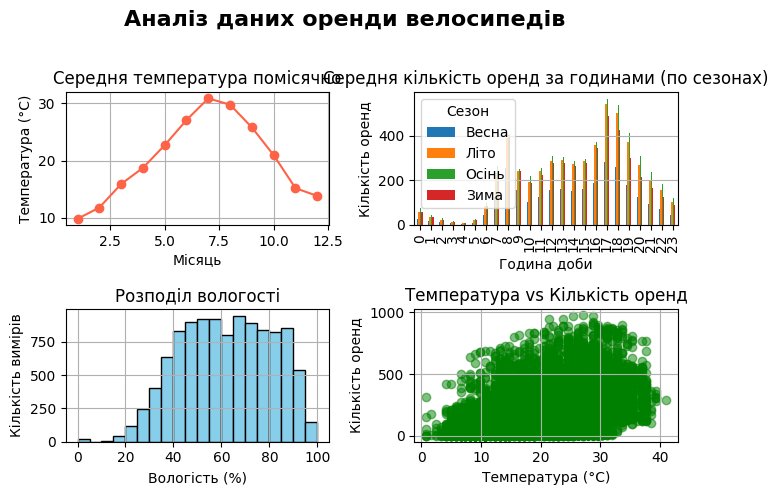

In [32]:
# Групування даних для графіків
monthly_temp = df.groupby('month')['temp'].mean()
season_hourly = df.groupby(['season', 'hour'])['count'].mean().unstack()
humidity_data = df['humidity']
temp_vs_count = df[['temp', 'count']]

# Починаємо малювання
plt.figure(figsize=(12, 8))
plt.suptitle('Аналіз даних оренди велосипедів', fontsize=16, fontweight='bold')

# 1. Лінійний графік середньої температури помісячно
plt.subplot(2, 2, 1)
monthly_temp.plot(kind='line', marker='o', color='tomato')
plt.title('Середня температура помісячно')
plt.xlabel('Місяць')
plt.ylabel('Температура (°C)')
plt.grid(True)

# 2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами
plt.subplot(2, 2, 2)
season_labels = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
season_hourly.index = season_hourly.index.map(season_labels)
season_hourly.T.plot(kind='bar', figsize=(7, 5), ax=plt.gca())
plt.title('Середня кількість оренд за годинами (по сезонах)')
plt.xlabel('Година доби')
plt.ylabel('Кількість оренд')
plt.legend(title='Сезон')
plt.grid(True, axis='y')

# 3. Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(humidity_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість (%)')
plt.ylabel('Кількість вимірів')
plt.grid(True)

# 4. Scatter plot температура vs кількість оренд
plt.subplot(2, 2, 4)
plt.scatter(temp_vs_count['temp'], temp_vs_count['count'], alpha=0.5, c='green')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')
plt.grid(True)

# Завершення оформлення
plt.tight_layout(rect=[0, 0, 1, 0.96])  # залишає місце для заголовка
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

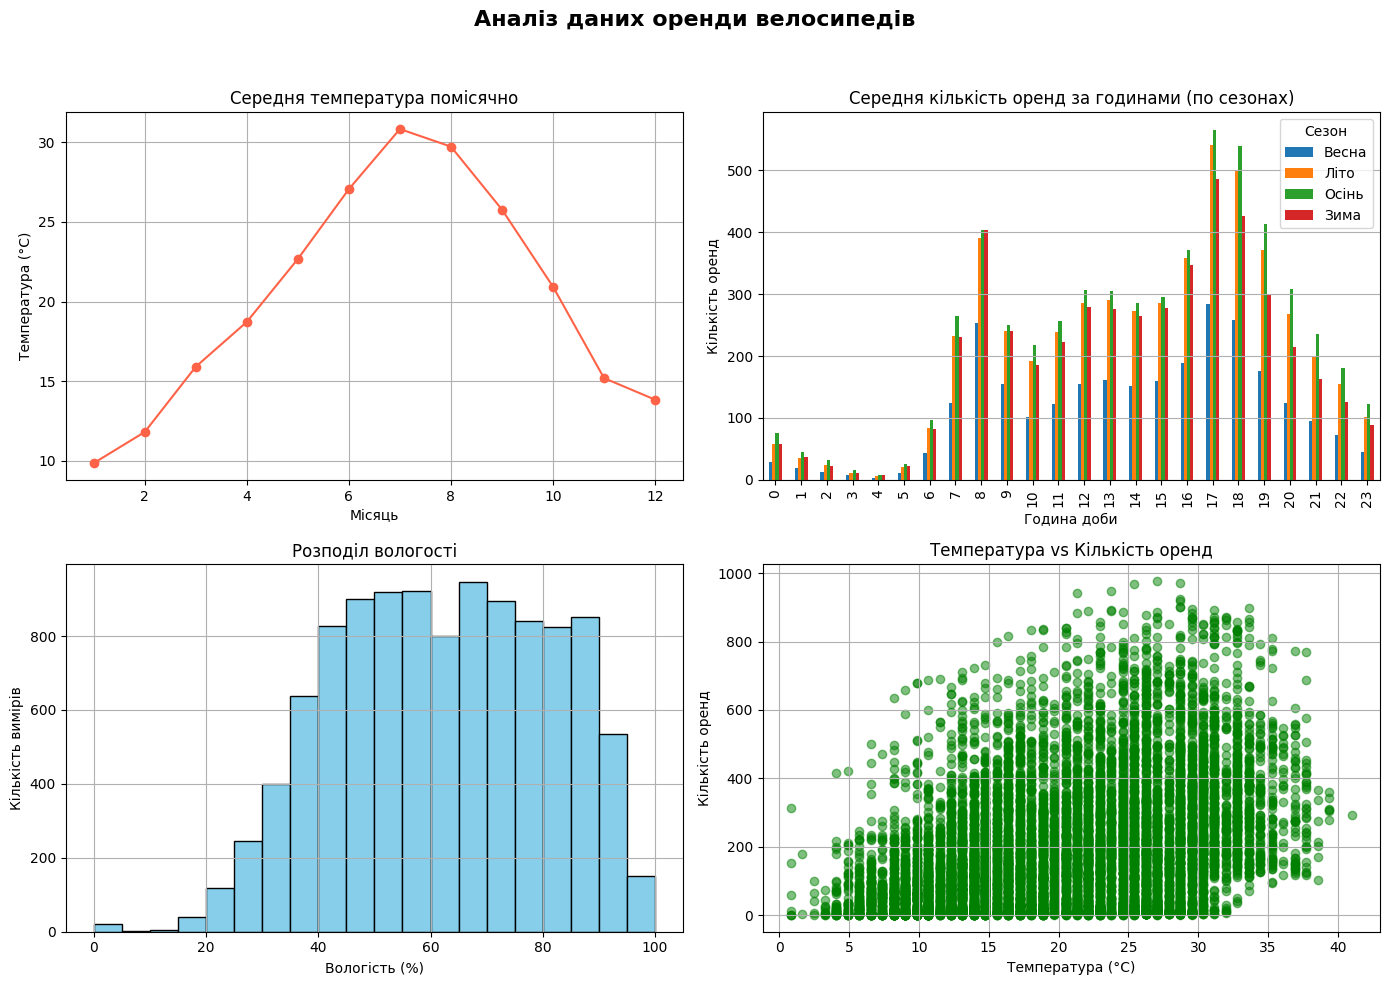

In [33]:
# Дані для графіків
monthly_temp = df.groupby('month')['temp'].mean()
season_hourly = df.groupby(['season', 'hour'])['count'].mean().unstack()
humidity_data = df['humidity']
temp_vs_count = df[['temp', 'count']]

# Назви сезонів
season_labels = {1: 'Весна', 2: 'Літо', 3: 'Осінь', 4: 'Зима'}
season_hourly.index = season_hourly.index.map(season_labels)

# Створення фігури і сітки 2x2
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Аналіз даних оренди велосипедів', fontsize=16, fontweight='bold')

# 1. Лінійний графік середньої температури помісячно
monthly_temp.plot(kind='line', marker='o', color='tomato', ax=ax[0, 0])
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Місяць')
ax[0, 0].set_ylabel('Температура (°C)')
ax[0, 0].grid(True)

# 2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами
season_hourly.T.plot(kind='bar', ax=ax[0, 1])
ax[0, 1].set_title('Середня кількість оренд за годинами (по сезонах)')
ax[0, 1].set_xlabel('Година доби')
ax[0, 1].set_ylabel('Кількість оренд')
ax[0, 1].legend(title='Сезон')
ax[0, 1].grid(True, axis='y')

# 3. Гістограма вологості
ax[1, 0].hist(humidity_data, bins=20, color='skyblue', edgecolor='black')
ax[1, 0].set_title('Розподіл вологості')
ax[1, 0].set_xlabel('Вологість (%)')
ax[1, 0].set_ylabel('Кількість вимірів')
ax[1, 0].grid(True)

# 4. Scatter plot температура vs кількість оренд
ax[1, 1].scatter(temp_vs_count['temp'], temp_vs_count['count'], alpha=0.5, c='green')
ax[1, 1].set_title('Температура vs Кількість оренд')
ax[1, 1].set_xlabel('Температура (°C)')
ax[1, 1].set_ylabel('Кількість оренд')
ax[1, 1].grid(True)

# Фінальне оформлення
plt.tight_layout(rect=[0, 0, 1, 0.95])  # залишити місце для заголовка
plt.show()


**Відповідь на питання:**
У plt.subplot() кожен графік створюється окремо.Для кожного треба вручну вказувати положення. Менше контролю над окремими осями. Важче змінювати стиль окремих підграфіків.
fig, ax = plt.subplots(). Одразу створюється вся сітка графіків (наприклад, 2×2). Тут легко додавати назви, підписи тощо.
Тобто, для простих візуалізацій plt.subplot, plt.subplots() для складних, більш професійних візуалізацій.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

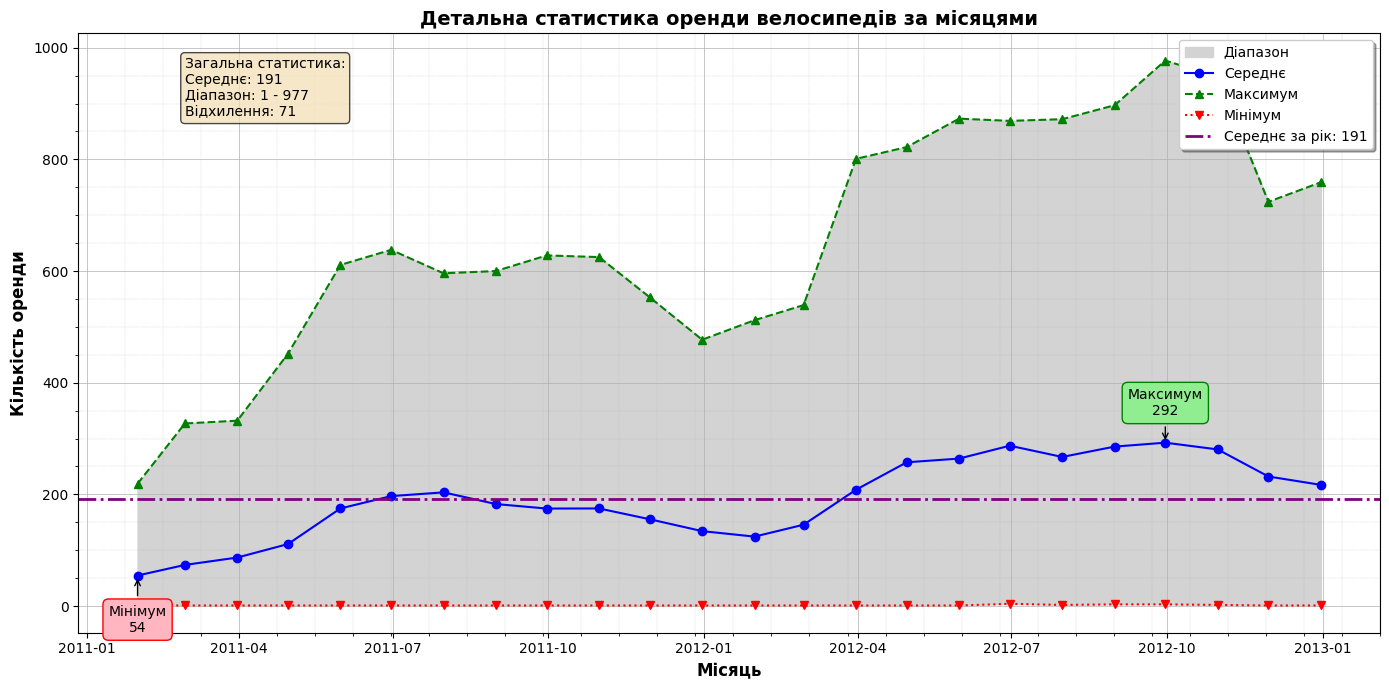

In [37]:
# Групування помісячно
monthly = df['count'].resample('ME').agg(['mean', 'max', 'min'])

# Обчислення загальної статистики
mean_overall = round(monthly['mean'].mean())
std_dev = round(monthly['mean'].std())
min_val = int(monthly['mean'].min())
min_date = monthly['mean'].idxmin()
max_val = int(monthly['mean'].max())
max_date = monthly['mean'].idxmax()
range_min = int(monthly['min'].min())
range_max = int(monthly['max'].max())

# Побудова графіка
plt.figure(figsize=(14, 7))

# Заливка між min і max
plt.fill_between(monthly.index, monthly['min'], monthly['max'], color='lightgrey', label='Діапазон')

# Середнє
plt.plot(monthly.index, monthly['mean'], color='blue', marker='o', linestyle='-', label='Середнє')

# Максимум
plt.plot(monthly.index, monthly['max'], color='green', marker='^', linestyle='--', label='Максимум')

# Мінімум
plt.plot(monthly.index, monthly['min'], color='red', marker='v', linestyle=':', label='Мінімум')

# Горизонтальна лінія середнього
plt.axhline(mean_overall, color='purple', linestyle='-.', linewidth=2, label=f'Середнє за рік: {mean_overall}')

# Анотації
plt.annotate(f'Максимум\n{max_val}', 
             xy=(max_date, max_val), xytext=(max_date, max_val + 50),
             bbox=dict(boxstyle='round,pad=0.4', fc='lightgreen', ec='green'),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             ha='center')

plt.annotate(f'Мінімум\n{min_val}', 
             xy=(min_date, min_val), xytext=(min_date, min_val - 100),
             bbox=dict(boxstyle='round,pad=0.4', fc='lightpink', ec='red'),
             arrowprops=dict(facecolor='red', arrowstyle='->'),
             ha='center')

# Статистичний блок
stats_text = (f"Загальна статистика:\n"
              f"Середнє: {mean_overall}\n"
              f"Діапазон: {range_min} - {range_max}\n"
              f"Відхилення: {std_dev}")

plt.text(monthly.index[1], range_max - 100, stats_text, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7),
         fontsize=10)

# Стилізація
plt.title('Детальна статистика оренди велосипедів за місяцями', fontsize=14, weight='bold')
plt.xlabel('Місяць', fontsize=12, weight='bold')
plt.ylabel('Кількість оренди', fontsize=12, weight='bold')

plt.grid(which='major', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth=0.3)

# Легенда
plt.legend(loc='upper right', shadow=True, fontsize=10)

plt.tight_layout()
plt.show()

**Відповіді на питання для інтерпретації:**

1. Анатоції значно полегшують сприйняття візуальної інформації і акцентують увагу на найважливіших значеннях (макс., мін.).
2. fill_between використовується, щоб заповнити (зафарбувати простір між 2-ома кривими або між кривою і віссю Х).На графіку використона 
fill_between(min, max), щоб візуально показати розкид значень у кожному місяці (варіацію). 
Це наочне уявлення про діапазон значень — наприклад, коли навіть середнє постійне, але мін і макс дуже різняться, це одразу помітно.
3. Текстовий блок допомагає винести статистуку прямо на графік. Це підвищує зрозумілість для тих, хто мало знайомий із даними. 
Можна порівнювати тренд на графіку з аналітичними показниками (наприклад: "Середнє ≈ пряма").